![alt text](header.png "KI Basiskurs")

# KI Basiskurs: Beispiel zu einer einfachen Bildklassifizierung

In diesem Beispiel werden wir ein einfaches Beispiel in der Sprach PYTHON gemeinsam durchgehen. Die folgenden Schritte passieren in diesem Programmcode:
- Importieren aller notwendigen Programmteile
- Laden der Beispieldaten
- Anzeige der Anzahl der Samples
- Anzeige von Beispielen der Daten
- Vorbereitung der Daten für die Klassifizierung
- Erstellen eines leeren Modelle
- Training des Modelles
- Test

Quelle: [https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/]

In [55]:
# Importieren aller notwendigen Programmteile
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Laden der Beispieldaten (hier sehr vereinfacht) und Aufteilung in Trainings- und Testdaten
(trainX, trainY), (testX, testY) = mnist.load_data()


In [57]:
# Anzeige der Anzahl der Samples
print('Trainingsdaten: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testdaten: X=%s, y=%s' % (testX.shape, testY.shape))


Trainingsdaten: X=(60000, 28, 28), y=(60000,)
Testdaten: X=(10000, 28, 28), y=(10000,)


## Anzeige der Anzahl der Samples

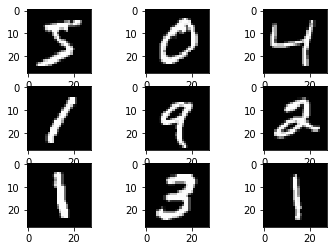

In [58]:
# Anzeige von Beispielen der Daten
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
plt.show()


## Vorbereitung der Daten

In [59]:
# Ändere die Matrixform der Daten
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))


In [60]:
# Ändere Pixelwerte von 0..255 auf einen Wert zwischen 0 und 1 in Flieskommaform
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0


In [61]:
# Ändere die Zielwerte für die Klassifizierung (eine Vektorstelle pro Klasse)
trainY = to_categorical(trainY)
testY = to_categorical(testY)


## Erstellen eines leeren Modelles

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


## Training des Modelles

In [63]:
model.fit(trainX, trainY, epochs=2, batch_size=64, validation_data=(testX, testY), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 35s 582us/step - loss: 0.1470 - accuracy: 0.9540 - val_loss: 0.0554 - val_accuracy: 0.9824
Epoch 2/2
60000/60000 [==============================] - 36s 596us/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0449 - val_accuracy: 0.9858


In [64]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('%.2f%% Accuracy' % (acc * 100.0))

98.58% Accuracy


## Testen mit Beispielen aus den Testdaten die fehlschlagen

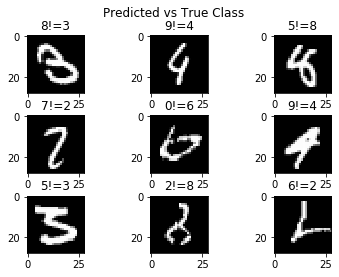

In [65]:
# Anzeige von Beispielen der Daten
from numpy import argmax

plotCount = 0
fig = plt.figure()
fig.suptitle('Predicted vs True Class')

for i in range(testX.shape[0]):
    
    correctClass = argmax(testY[i])
    image = testX[i].reshape((1,28,28,1))
    prediction = model.predict_classes([image])
    predictedClass = prediction[0]
    
    
    if predictedClass != correctClass:
        ax = pyplot.subplot(330 + 1 + plotCount)
        ax.set_title('{}!={}'.format ( str(predictedClass), str(correctClass)))     
        image = testX[i].reshape((28,28))
        plt.imshow(image, cmap=pyplot.get_cmap('gray'))    
        plotCount+= 1
        
    if plotCount >= 9:
        break

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()


## Testen mit einem eigenen Beispielfile

In [66]:
# Laden weiterer Funktionen
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [67]:
# Funktion für das Laden eines Bildes aus einer Datei
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img